## Trabalhadores do café: escravizados, imigrantes e nacionais em São Paulo, 1886

Resultados preliminares de estimativa do número de trabalhadores engajados na produção de café em municípios da província de São Paulo em 1886. Projeto em andamento.

As fontes dos dados utilizados incluem as listas de matrículas de escravos, o recenseamento de 1886 (São Paulo, *Relatório da Comissão Central de Estatística*, 1888) e informações de fazendas individuais coletadas por C. F. van Delden Laërne, *Brazil and Java* (1885), Louis Couty. *Étude de biologie industrielle sur le café* (1883) e Francisco de Paula Lazaro Gonçalves, *Relatorio apresentado á Associação Promotora de Immigração de Minas* (1888).

A metodologia das estimativas será descrita em artigo. O banco de dados completo estará disponível para consulta em breve.

Autor: Renato Perim Colistete, rcolistete@usp.br

Data: 9/11/2021

Column(background='ghostwhite', sizing_mode='stretch_width')
    [0] Column(sizing_mode='stretch_width')
        [0] PNG(str, sizing_mode='stretch_width', width=80)
        [1] Markdown(str, sizing_mode='stretch_width')
        [2] Markdown(str, sizing_mode='stretch_width')
        [3] Interactive(Interactive, sizing_mode='stretch_width')
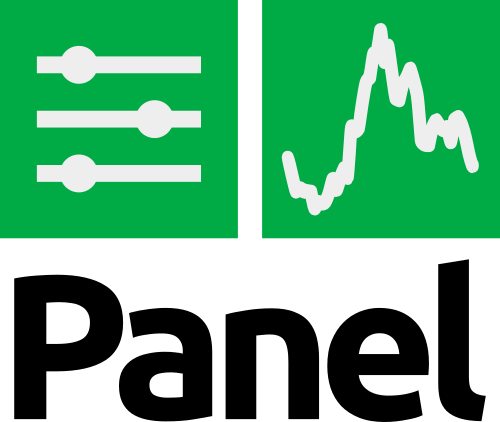

In [2]:
# Importar bibliotecas
import numpy as np
import pandas as pd
import holoviews as hv
import hvplot.pandas
import panel as pn
pn.extension(sizing_mode='stretch_width')

# Importar dados
df = pd.read_excel('cafe_1886_binder.xlsx')

# Preparar df para pipeline encadeado e dinâmico com widgets
dfi = df.interactive()

# Criar os widgets básicos para organização dos dados. Primeiro, um widget para selecionar a região desejada:
reg = pn.widgets.Select(name='Região', value='Paulista',
                        options=['Araraquarense', 'Alta Sorocabana', 'Baixa Sorocabana', 'Central', 'Mogiana', 
                                 'Paulista', 'Sorocaba', 'Vale do Paraíba'])

# Criar sliders. Slider com número mínimo e máximo de escravizados dos municípios
esc_number = pn.widgets.IntSlider(name='Número mínimo de escravizados', start=8, end=3875, value=8)

# Slider para imigrantes
imig_number = pn.widgets.IntSlider(name='Número mínimo de imigrantes', start=0, end=1362, value=0)

# Slider para nacionais
nac_number = pn.widgets.IntSlider(name='Número mínimo de nacionais', start=1, end=2758, value=0)

# Combinar todos os widgets em um pipeline
pipe = dfi[(dfi['reg'] == reg) & 
           (dfi['esc_café'] >= esc_number) &
           (dfi['imig_café'] >= imig_number) &
           (dfi['nac_café'] >= nac_number)
          ]

# Criar gráfico interativo com hvplot
fig = pipe.hvplot(x= 'mun', y=['esc_café', 'imig_café', 'nac_café'], 
                stacked=False, 
                kind='bar',
                rot=45,
                yformatter='%.0f',
                responsive=True, 
                min_height=450,
                legend='bottom',
                cmap='glasbey_hv',
                ylabel='número estimado de trabalhadores',
                xlabel='').opts(multi_level=False)
pane = pn.panel(fig)

# Gerar dashboard interativo
dash_title ='## Trabalhadores do café: escravizados, imigrantes e nacionais em São Paulo'
dash_subtitle = '#### Estimativa do número de trabalhadores engajados na produção de café, São Paulo, 1886'

pn.Column(
    pn.Column(
    (pn.panel("https://panel.holoviz.org/_static/logo_stacked.png", width=80)),
    dash_title,
    dash_subtitle,
    pane),
    background='ghostwhite')